# 0.0 Environment Setup

In [280]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white' # Since I use a dark IDE
pd.set_option("display.max_columns", None) # Show all columns of dataframe in jupyter notebook
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_oneway

# To allow multiple outputs per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

In [281]:
# Loading data
df = pd.read_csv("wba_data_CLEAN.csv")

# 1.0 Data Overview

## 1.1 Overview

In [282]:
# First 5 rows
df.head()

,Unnamed: 0,Subject,Gender,AgeY,ECV,TPP,SC,TympType,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,OverallPoF,Ear coded,Pressure,f(226.0000),f(257.3256),f(280.6155),f(297.3018),f(324.2099),f(343.4884),f(363.9133),f(385.5527),f(408.4789),f(432.7683),f(458.5020),f(471.9372),f(500.0000),f(514.6511),f(545.2539),f(561.2310),f(577.6763),f(594.6036),f(629.9605),f(648.4198),f(667.4199),f(686.9768),f(707.1068),f(727.8266),f(749.1535),f(771.1054),f(793.7005),f(816.9577),f(840.8964),f(865.5366),f(890.8987),f(917.0040),f(943.8743),f(971.5319),f(1000.0000),f(1029.3022),f(1059.4631),f(1090.5077),f(1122.4620),f(1155.3527),f(1189.2071),f(1224.0535),f(1259.9210),f(1296.8396),f(1334.8399),f(1373.9536),f(1414.2136),f(1455.6532),f(1498.3071),f(1542.2108),f(1587.4011),f(1633.9155),f(1681.7928),f(1731.0731),f(1781.7974),f(1834.0081),f(1887.7486),f(1943.0639),f(2000.0000),f(2058.6045),f(2118.9262),f(2181.0155),f(2244.9241),f(2310.7054),f(2378.4142),f(2448.1071),f(2519.8421),f(2593.6791),f(2669.6797),f(2747.9073),f(2828.4271),f(2911.3064),f(2996.6142),f(3084.4217),f(3174.8021),f(3267.8309),f(3363.5857),f(3462.1462),f(3563.5949),f(3668.0162),f(3775.4973),f(3886.1278),f(4000.0000),f(4117.2089),f(4237.8524),f(4362.0309),f(4489.8482),f(4621.4108),f(4756.8285),f(4896.2142),f(5039.6842),f(5187.3582),f(5339.3594),f(5495.8146),f(5656.8542),f(5822.6127),f(5993.2283),f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000),PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0,8,0,9.333333,1.08,-189.0,0.52,0,3.0,10.0,18.0,14.0,8.0,1,0,-1,0.0987,0.1274,0.1592,0.1737,0.1700,0.1617,0.1640,0.1799,0.1932,0.1969,0.1945,0.2040,0.2331,0.2646,0.2814,0.2864,0.2780,0.2798,0.2903,0.3054,0.3195,0.3141,0.3040,0.2979,0.3086,0.3359,0.3423,0.3344,0.3250,0.3273,0.3352,0.3416,0.3192,0.2875,0.2756,0.3008,0.3060,0.2835,0.2476,0.2107,0.1264,0.0665,0.0802,0.1397,0.1559,0.1386,0.1716,0.2288,0.2430,0.2370,0.2507,0.2851,0.2684,0.1879,0.1790,0.2646,0.3537,0.3524,0.3405,0.3685,0.3931,0.4669,0.5617,0.5704,0.6307,0.6768,0.6312,0.5511,0.4541,0.3997,0.3860,0.3992,0.5132,0.5290,0.5218,0.5345,0.5091,0.5274,0.5573,0.6085,0.6651,0.7186,0.8002,0.8258,0.8262,0.8268,0.8322,0.8309,0.8331,0.8310,0.8232,0.7993,0.7864,0.7752,0.7459,0.6902,0.5721,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003,8.842811,4.602442,6.650183,3.921888,-1.261711,-0.405697,-2.841202,1.594642,0.724436,-0.579289,-0.553364,0.704006,-0.409157,0.072477,-0.217327
1,1,22,0,9.500000,1.28,-49.0,1.28,1,7.0,4.0,9.0,5.0,6.0,0,0,-4,0.1114,0.1501,0.1860,0.2033,0.1953,0.1831,0.1825,0.1934,0.2047,0.2090,0.1976,0.2039,0.2328,0.2685,0.2881,0.2945,0.2897,0.2860,0.2995,0.3227,0.3391,0.3331,0.3224,0.3189,0.3433,0.3746,0.3959,0.3978,0.4007,0.4147,0.4429,0.4798,0.4845,0.4749,0.4923,0.5413,0.5623,0.5677,0.5588,0.5373,0.4905,0.4730,0.5123,0.5723,0.5850,0.5796,0.5956,0.6186,0.6162,0.6015,0.6003,0.6084,0.5785,0.5060,0.4805,0.5129,0.5498,0.5264,0.4878,0.4813,0.4627,0.4807,0.5316,0.5089,0.5539,0.6224,0.6327,0.6382,0.6299,0.6271,0.6319,0.6045,0.6462,0.6485,0.6693,0.7022,0.7422,0.7781,0.8128,0.8389,0.8544,0.8376,0.8420,0.8163,0.7737,0.7189,0.6694,0.5809,0.4942,0.4445,0.4712,0.4579,0.4678,0.4669,0.4417,0.3883,0.2764,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659,0.409498,2.915318,2.149802,0.805619,-0.756510,1.479339,1.668937,-0.048483,0.608993,0.251156,-0.710949,0.604375,-0.616950,0.637559,-0.469144
2,2,24,1,9.833333,1.26,-27.0,0.87,1,9.0,12.0,8.0,12.0,16.0,0,0,-4,0.1096,0.1509,0.1941,0.2156,0.2139,0.2065,0.2172,0.2413,0.2607,0.2706,0.2761,0.2952,0.3335,0.3801,0.4066,0.4160,0.4151,0.4228,0.4365,0.4591,0.4709,0.4645,0.4597,0.4676,0.4914,0.5154,0.5240,0.5219,0.5221,0.5371,0.5602,0.5831,0.5804,0.5698,0.5717,0.6007,0.6180,0.6205,0.6133,0.6031,0.5684,0.5510,0.5715,0.6113,0.6193,0.6042,0.6074,0.6260,0.6194,0.6143,0.6288,0.6591,0.6692,0.6482,0.6574,0.6997,0.7233,0.6812,0.6147,0.5830,0.5460,0.5457,0.5725,0.5277,0.5519,0.6036,0.6059,0.6181,0.6234,0.6398,0

Segregating column names into:
* Frequency (WBA) columns
    * f(226.0000) to f(8000.0000) - The absorbance (amount of sound absorbed by the middle ear) at a particular frequency between 226Hz to 8KHz.
* Principal Component Analysis (PCA) columns
    * PC1 to PC15 - First 15 principal components of our data
* Control variable columns
    * Gender    - The gender of the individual (1 for Male, 0 for Female)
    * AgeY      - The age of the individual in years (range from 8 to 11)
    * TPP       - Peak tympanometric pressure measured
    * SC        - Static Compliane
    * ECV       - Ear Canal Volume
    * TympType  - Tympanic membrane type (A is normal, B/C1/C2 are abnormal)
    * OAE1      - Otoacoustic emission of inner ear at 1Hz
    * OAE1.4    - Otoacoustic emission of inner ear at 1.4kHz
    * OAE2      - Otoacoustic emission of inner ear at 2kHz
    * OAE2.8    - Otoacoustic emission of inner ear at 2.8kHz
    * OAE4      - Otoacoustic emission of inner ear at 4kHz
    * Earcoded  - EarSide (Left as 0 and Right as 1)
    * Pressure  - Unexplained in metadata
* Other
    * Subject    - Unique identifier for individual
    * OverallPoF - Has the individual passes all audiometry tests 

In [283]:
freq_cols = [col for col in df.columns if col[:2] == "f("]
pca_cols = [col for col in df.columns if col[:2] == "PC"]
control_cols = ["Gender", "AgeY", "ECV", "TPP", "SC", "TympType", "OAE1", "OAE1.4", "OAE2", "OAE2.8", "OAE4", "Ear coded", "Pressure"]

df[freq_cols].head()
df[pca_cols].head()
df[control_cols].head()

,f(226.0000),f(257.3256),f(280.6155),f(297.3018),f(324.2099),f(343.4884),f(363.9133),f(385.5527),f(408.4789),f(432.7683),f(458.5020),f(471.9372),f(500.0000),f(514.6511),f(545.2539),f(561.2310),f(577.6763),f(594.6036),f(629.9605),f(648.4198),f(667.4199),f(686.9768),f(707.1068),f(727.8266),f(749.1535),f(771.1054),f(793.7005),f(816.9577),f(840.8964),f(865.5366),f(890.8987),f(917.0040),f(943.8743),f(971.5319),f(1000.0000),f(1029.3022),f(1059.4631),f(1090.5077),f(1122.4620),f(1155.3527),f(1189.2071),f(1224.0535),f(1259.9210),f(1296.8396),f(1334.8399),f(1373.9536),f(1414.2136),f(1455.6532),f(1498.3071),f(1542.2108),f(1587.4011),f(1633.9155),f(1681.7928),f(1731.0731),f(1781.7974),f(1834.0081),f(1887.7486),f(1943.0639),f(2000.0000),f(2058.6045),f(2118.9262),f(2181.0155),f(2244.9241),f(2310.7054),f(2378.4142),f(2448.1071),f(2519.8421),f(2593.6791),f(2669.6797),f(2747.9073),f(2828.4271),f(2911.3064),f(2996.6142),f(3084.4217),f(3174.8021),f(3267.8309),f(3363.5857),f(3462.1462),f(3563.5949),f(3668.0162),f(3775.4973),f(3886.1278),f(4000.0000),f(4117.2089),f(4237.8524),f(4362.0309),f(4489.8482),f(4621.4108),f(4756.8285),f(4896.2142),f(5039.6842),f(5187.3582),f(5339.3594),f(5495.8146),f(5656.8542),f(5822.6127),f(5993.2283),f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000)
0,0.0987,0.1274,0.1592,0.1737,0.1700,0.1617,0.1640,0.1799,0.1932,0.1969,0.1945,0.2040,0.2331,0.2646,0.2814,0.2864,0.2780,0.2798,0.2903,0.3054,0.3195,0.3141,0.3040,0.2979,0.3086,0.3359,0.3423,0.3344,0.3250,0.3273,0.3352,0.3416,0.3192,0.2875,0.2756,0.3008,0.3060,0.2835,0.2476,0.2107,0.1264,0.0665,0.0802,0.1397,0.1559,0.1386,0.1716,0.2288,0.2430,0.2370,0.2507,0.2851,0.2684,0.1879,0.1790,0.2646,0.3537,0.3524,0.3405,0.3685,0.3931,0.4669,0.5617,0.5704,0.6307,0.6768,0.6312,0.5511,0.4541,0.3997,0.3860,0.3992,0.5132,0.5290,0.5218,0.5345,0.5091,0.5274,0.5573,0.6085,0.6651,0.7186,0.8002,0.8258,0.8262,0.8268,0.8322,0.8309,0.8331,0.8310,0.8232,0.7993,0.7864,0.7752,0.7459,0.6902,0.5721,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,0.1114,0.1501,0.1860,0.2033,0.1953,0.1831,0.1825,0.1934,0.2047,0.2090,0.1976,0.2039,0.2328,0.2685,0.2881,0.2945,0.2897,0.2860,0.2995,0.3227,0.3391,0.3331,0.3224,0.3189,0.3433,0.3746,0.3959,0.3978,0.4007,0.4147,0.4429,0.4798,0.4845,0.4749,0.4923,0.5413,0.5623,0.5677,0.5588,0.5373,0.4905,0.4730,0.5123,0.5723,0.5850,0.5796,0.5956,0.6186,0.6162,0.6015,0.6003,0.6084,0.5785,0.5060,0.4805,0.5129,0.5498,0.5264,0.4878,0.4813,0.4627,0.4807,0.5316,0.5089,0.5539,0.6224,0.6327,0.6382,0.6299,0.6271,0.6319,0.6045,0.6462,0.6485,0.6693,0.7022,0.7422,0.7781,0.8128,0.8389,0.8544,0.8376,0.8420,0.8163,0.7737,0.7189,0.6694,0.5809,0.4942,0.4445,0.4712,0.4579,0.4678,0.4669,0.4417,0.3883,0.2764,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,0.1096,0.1509,0.1941,0.2156,0.2139,0.2065,0.2172,0.2413,0.2607,0.2706,0.2761,0.2952,0.3335,0.3801,0.4066,0.4160,0.4151,0.4228,0.4365,0.4591,0.4709,0.4645,0.4597,0.4676,0.4914,0.5154,0.5240,0.5219,0.5221,0.5371,0.5602,0.5831,0.5804,0.5698,0.5717,0.6007,0.6180,0.6205,0.6133,0.6031,0.5684,0.5510,0.5715,0.6113,0.6193,0.6042,0.6074,0.6260,0.6194,0.6143,0.6288,0.6591,0.6692,0.6482,0.6574,0.6997,0.7233,0.6812,0.6147,0.5830,0.5460,0.5457,0.5725,0.5277,0.5519,0.6036,0.6059,0.6181,0.6234,0.6398,0.6617,0.6487,0.6977,0.6907,0.6873,0.7092,0.7063,0.7209,0.7268,0.7269,0.7022,0.6771,0.6697,0.6337,0.6045,0.5735,0.5429,0.4691,0.4092,0.4078,0.4804,0.5099,0.5462,0.5713,0.5664,0.5321,0.4385,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,0.0748,0.0953,0.1190,0.1285,0.1233,0.1151,0.1169,0.1294,0.1411,0.1465,0.1478,0.1597,0.1895,0.2251,0.2484,0.2580,0.2615,0.2692,0.2883,0.3155,0.3415,0.3533,0.3645,0.3823,0.4229,0.4656,0.4970,0.5152,0.5284,0.5546,0.5958,0.6482,0.6715,0.6792,0.7107,0.7438,0.7420,0.7291,0.7278,0.7266,0.7111,0.7066,0.7182,0.7311,0.7386,0.7523,0.7781,0.7835,0.7557,0.7201,0.6863,0.6426,0.5796,0.5413,0.5507,0.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,8.842811,4.602442,6.650183,3.921888,-1.261711,-0.405697,-2.841202,1.594642,0.724436,-0.579289,-0.553364,0.704006,-0.409157,0.072477,-0.217327
1,0.409498,2.915318,2.149802,0.805619,-0.756510,1.479339,1.668937,-0.048483,0.608993,0.251156,-0.710949,0.604375,-0.616950,0.637559,-0.469144
2,-4.250247,6.157587,4.050205,0.997024,1.200107,-0.343253,-0.215469,-0.777275,-1.703650,0.510768,-0.413348,-0.206985,-0.375959,0.339409,-0.049631
3,-3.358109,2.419031,-5.375304,-2.836131,-0.626075,-0.603940,1.065511,1.333238,0.796636,0.454654,-0.116502,0.247162,0.303749,-0.243954,-0.046242
4,-6.687540,11.855088,1.251906,-0.700132,-0.092689,-0.434886,2.172756,0.895713,1.079165,1.445886,0.345314,-1.758196,0.268712,-0.148645,-0.204201


,Gender,AgeY,ECV,TPP,SC,TympType,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,Ear coded,Pressure
0,0,9.333333,1.08,-189.0,0.52,0,3.0,10.0,18.0,14.0,8.0,0,-1
1,0,9.500000,1.28,-49.0,1.28,1,7.0,4.0,9.0,5.0,6.0,0,-4
2,1,9.833333,1.26,-27.0,0.87,1,9.0,12.0,8.0,12.0,16.0,0,-4
3,0,9.916667,0.64,-8.0,0.60,1,13.0,9.0,13.0,11.0,12.0,0,2
4,0,7.916667,0.92,-17.0,1.65,1,7.0,0.0,2.0,12.0,6.0,0,-2


In [284]:
# Data types
df.info()

# Numerical summaries
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Columns: 138 entries, Unnamed: 0 to PC15
dtypes: float64(131), int64(7)
memory usage: 257.8 KB


,Unnamed: 0,Subject,Gender,AgeY,ECV,TPP,SC,TympType,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,OverallPoF,Ear coded,Pressure,f(226.0000),f(257.3256),f(280.6155),f(297.3018),f(324.2099),f(343.4884),f(363.9133),f(385.5527),f(408.4789),f(432.7683),f(458.5020),f(471.9372),f(500.0000),f(514.6511),f(545.2539),f(561.2310),f(577.6763),f(594.6036),f(629.9605),f(648.4198),f(667.4199),f(686.9768),f(707.1068),f(727.8266),f(749.1535),f(771.1054),f(793.7005),f(816.9577),f(840.8964),f(865.5366),f(890.8987),f(917.0040),f(943.8743),f(971.5319),f(1000.0000),f(1029.3022),f(1059.4631),f(1090.5077),f(1122.4620),f(1155.3527),f(1189.2071),f(1224.0535),f(1259.9210),f(1296.8396),f(1334.8399),f(1373.9536),f(1414.2136),f(1455.6532),f(1498.3071),f(1542.2108),f(1587.4011),f(1633.9155),f(1681.7928),f(1731.0731),f(1781.7974),f(1834.0081),f(1887.7486),f(1943.0639),f(2000.0000),f(2058.6045),f(2118.9262),f(2181.0155),f(2244.9241),f(2310.7054),f(2378.4142),f(2448.1071),f(2519.8421),f(2593.6791),f(2669.6797),f(2747.9073),f(2828.4271),f(2911.3064),f(2996.6142),f(3084.4217),f(3174.8021),f(3267.8309),f(3363.5857),f(3462.1462),f(3563.5949),f(3668.0162),f(3775.4973),f(3886.1278),f(4000.0000),f(4117.2089),f(4237.8524),f(4362.0309),f(4489.8482),f(4621.4108),f(4756.8285),f(4896.2142),f(5039.6842),f(5187.3582),f(5339.3594),f(5495.8146),f(5656.8542),f(5822.6127),f(5993.2283),f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000),PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.00000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,239.000000,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02
mean,119.000000,247.652720,0.435146,8.868898,0.998703,-40.072034,0.717966,0.874477,10.294142,13.002929,12.192050,10.247238,9.084519,0.158996,0.497908,-1.866109,0.058317,0.086589,0.117395,0.133568,0.132890,0.127312,0.131723,0.145941,0.156587,0.157646,0.151943,0.162349,0.194186,0.232490,0.257532,0.263687,0.262213,0.267525,0.283777,0.308051,0.326822,0.329551,0.331027,0.336349,0.365871,0.403141,0.427083,0.433342,0.433259,0.443836,0.467324,0.494601,0.489658,0.472866,0.477815,0.512164,0.533814,0.541753,0.542751,0.541378,0.513863,0.497290,0.521937,0.562473,0.570733,0.56810,0.587094,0.616739,0.621405,0.616331,0.622741,0.633429,0.614513,0.567835,0.565501,0.608923,0.647055,0.631454,0.611586,0.613856,0.611265,0.633781,0.663805,0.643707,0.672874,0.711611,0.710371,0.713458,0.714970,0.726523,0.740777,0.742531,0.773290,0.776520,0.780635,0.788386,0.790268,0.790433,0.790327,0.786293,0.780988,0.762933,0.757486,0.755750,

We have 4 categorical columns - Gender, Ear coded, OverallPoF, TympType

## 1.2 Cleanliness

There appears to be no duplicated or null values.

In [285]:
# Checking for duplicated values
df.duplicated().any().any()

# Checking for null values
df.isnull().any().any()
df.isna().any().any()

False

False

False

## 1.3 Frequency Histograms

### 1.3.1 Control Variables

It appears that most numeric control variables follow a normal distribution, which will perform well in our ML models.

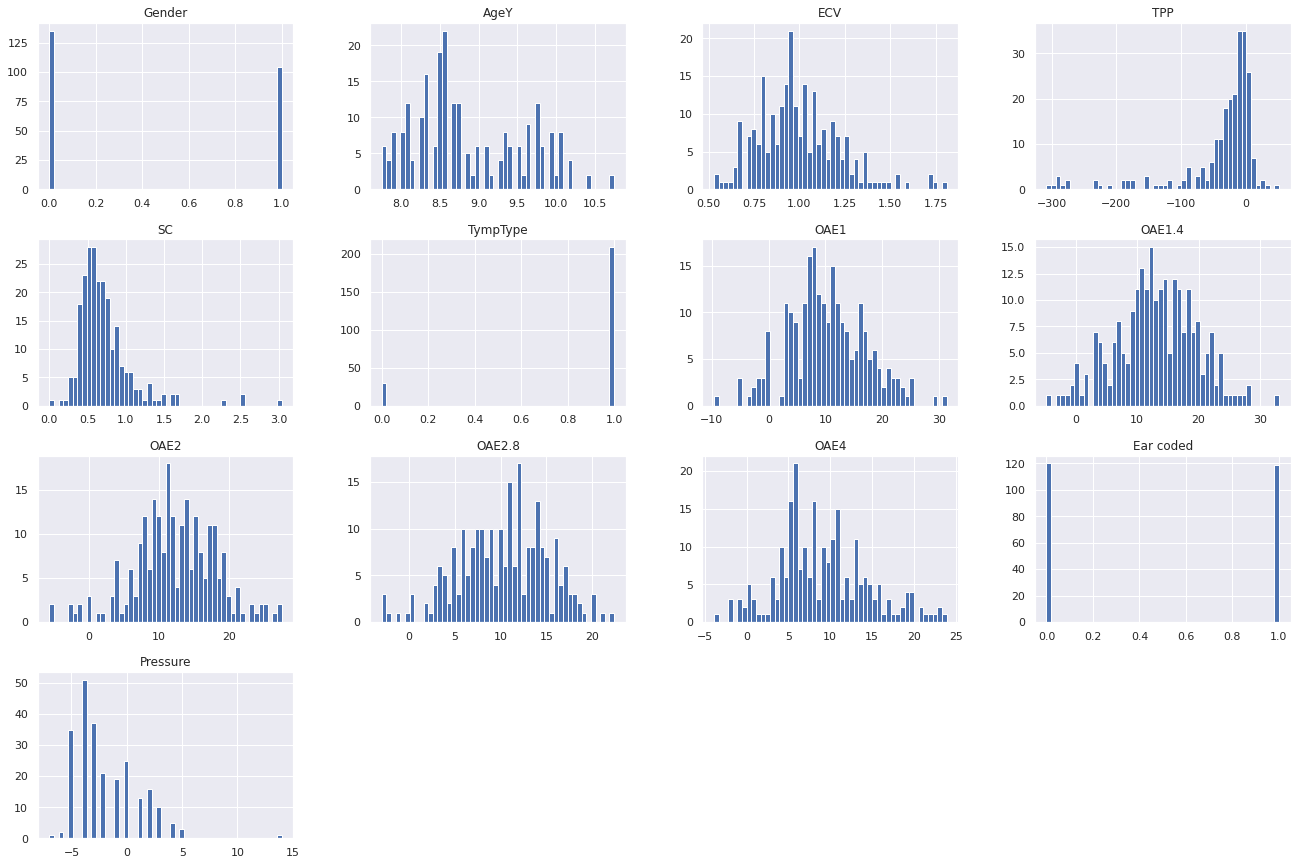

In [286]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white' # Since I use a dark IDE

df[control_cols].hist(bins=50, figsize=(20,15))
plt.show();

### 1.3.2 Frequencies

The histograms for absorbance levels of different frequencies are quite intuitive. 
- Lower frequencies' absorbance levels are right-skewed as individuals would likely have lower absorbance levels at low frequencies. 
- As frequencies tend towards speech level, absorbance levels become increasingly left-skewed.
- As frequency goes beyond speech level, absorbance levels once again become right-skewed.

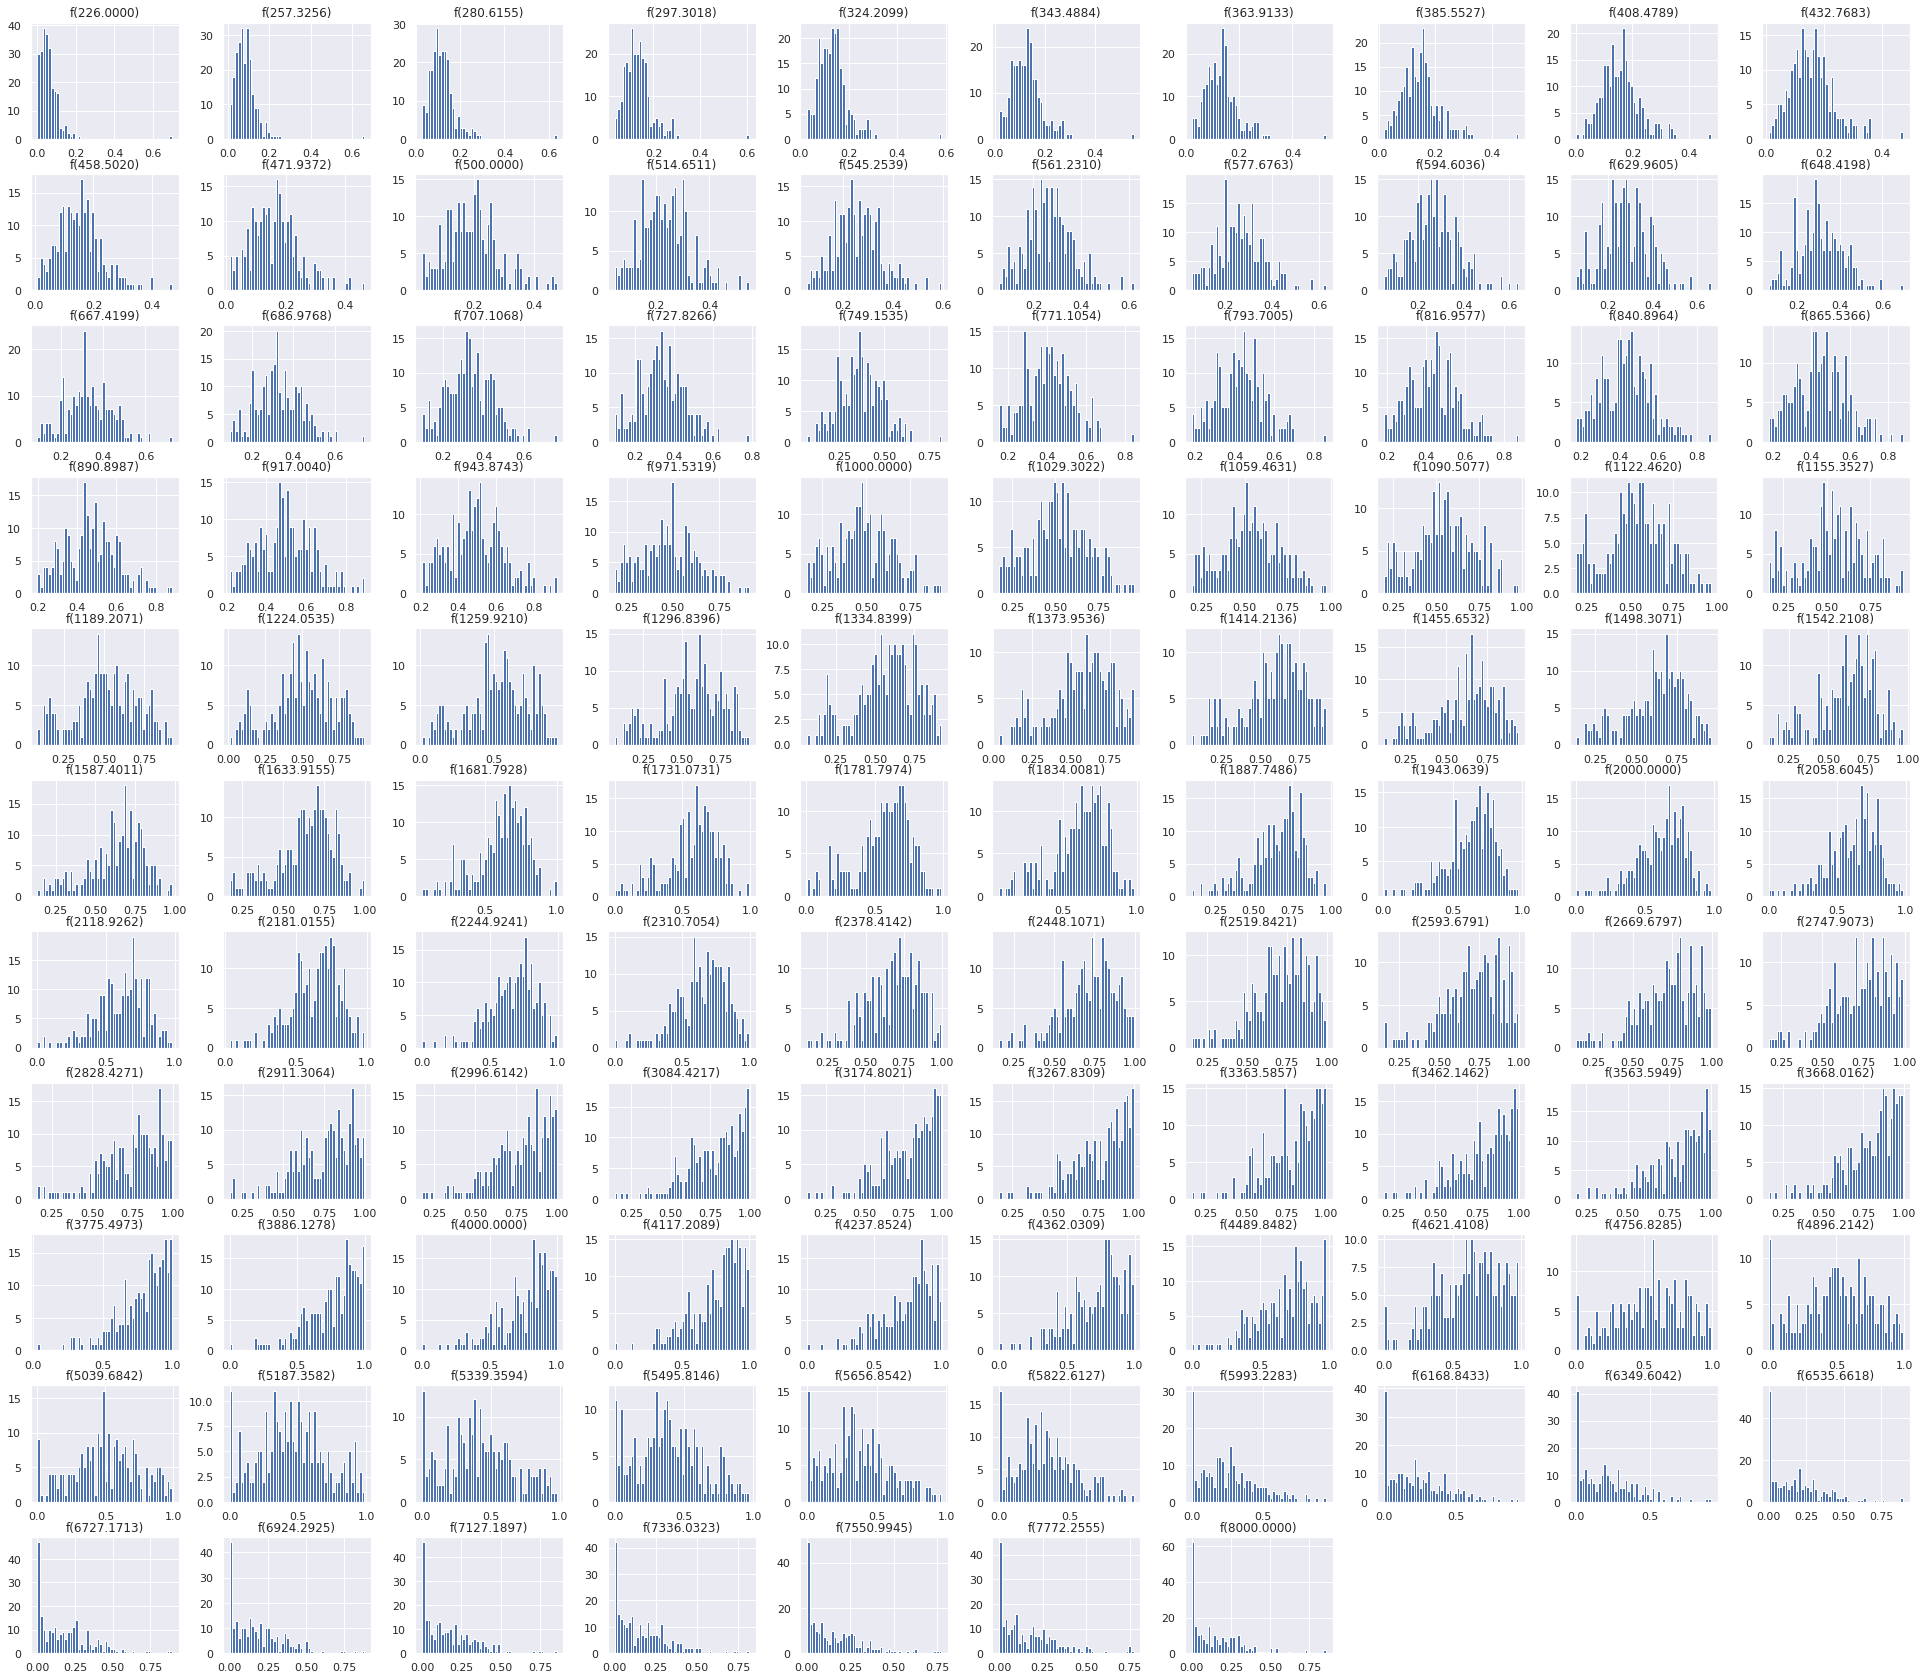

In [287]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white' # Since I use a dark IDE

df[freq_cols].hist(bins=50, figsize=(30,30))
plt.show();

### 1.3.3 Principal Components

All principal components approximate normal distribution.

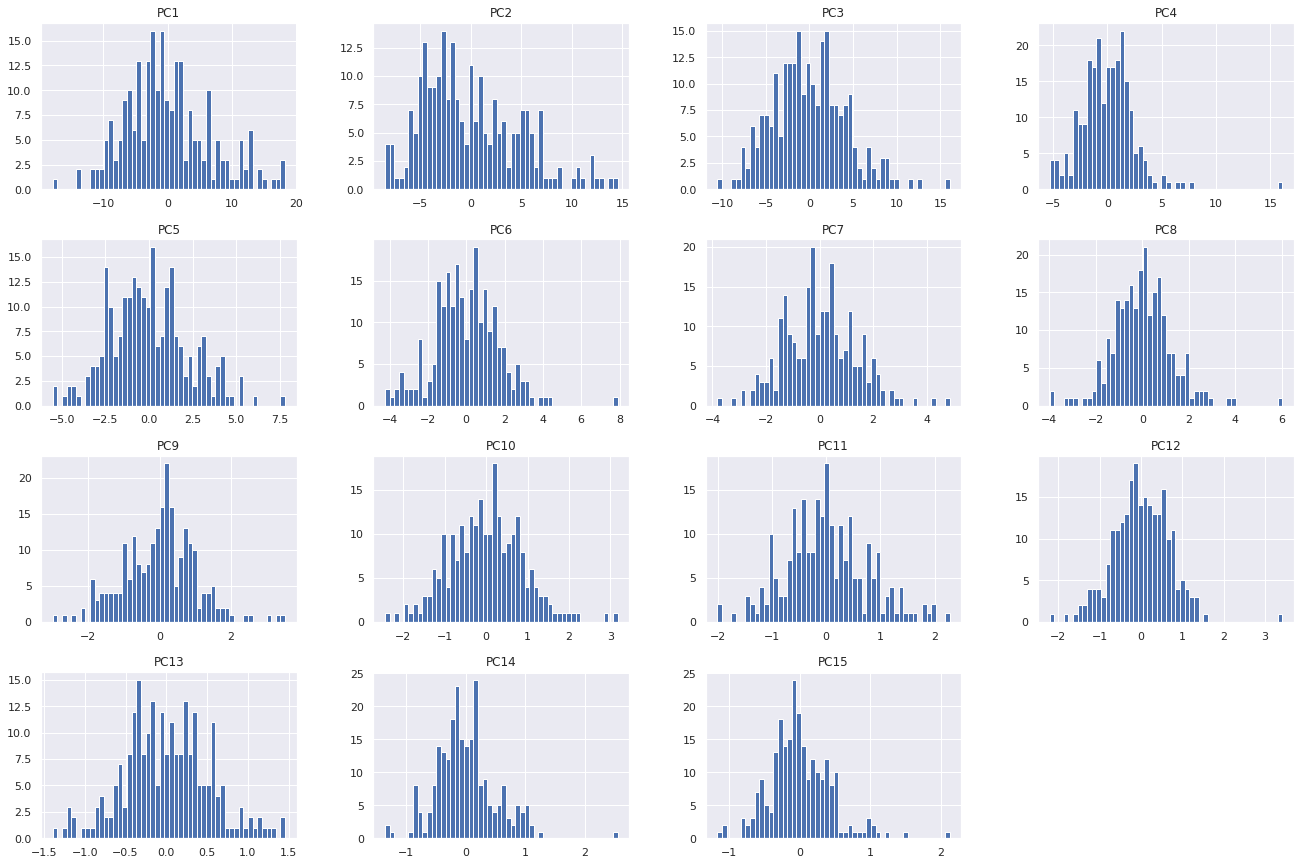

In [288]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white' # Since I use a dark IDE

df[pca_cols].hist(bins=50, figsize=(20,15))
plt.show();

# 2.0 Correlations

## 2.1 Categorical Control Variables

We perform chi-squared tests of independence between the OverallPoF and categorical control variable (e.g. gender, ear side, tymphanic membrane type)

In [289]:
# Gender vs OverallPoF
ct = pd.crosstab(df['Gender'], df['OverallPoF'])
p = stats.chi2_contingency(ct)[1]
print("the p-value of a chi-squared test is {}".format(p))

the p-value of a chi-squared test is 0.7307640360277896


Gender is uncorrelated from passing or failing an audiometry test

In [290]:
# Ear Side vs OverallPoF
ct = pd.crosstab(df['Ear coded'], df['OverallPoF'])
p = stats.chi2_contingency(ct)[1]
print("the p-value of a chi-squared test is {}".format(p))

the p-value of a chi-squared test is 1.0


Earside is uncorrelated from passing or failing an audiometry test

In [291]:
# Tymphanic Membrane Type vs OverallPoF
ct = pd.crosstab(df['TympType'], df['OverallPoF'])
p = stats.chi2_contingency(ct)[1]
print("the p-value of a chi-squared test is {}".format(p))

the p-value of a chi-squared test is 8.339700395751642e-40


Tymphanic Membrane Type is highly correlated with passing or failing an audiometry test

## 2.2 Numerical Control Variables

Tympanic membrane type is uncorrelated from passing or failing an audiometry test

In [292]:
numeric_control_variables = ['ECV', 'TPP', 'SC', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4']
for cv in numeric_control_variables:
    x1 = df.loc[df['OverallPoF'] == 1, cv].to_list()
    x2 = df.loc[df['OverallPoF'] == 0, cv].to_list()
    p = "CORRELATED" if f_oneway(x1, x2)[1][0] < 0.05 else "UN-CORRELATED"
    print("From a oneway ANOVA {} and OverallPoF are {}".format(cv, p))
# sns.boxplot(x='OverallPoF', y=numeric_control_variables, data=df)

From a oneway ANOVA ECV and OverallPoF are UN-CORRELATED
From a oneway ANOVA TPP and OverallPoF are CORRELATED
From a oneway ANOVA SC and OverallPoF are CORRELATED
From a oneway ANOVA OAE1 and OverallPoF are CORRELATED
From a oneway ANOVA OAE1.4 and OverallPoF are CORRELATED
From a oneway ANOVA OAE2 and OverallPoF are CORRELATED
From a oneway ANOVA OAE2.8 and OverallPoF are CORRELATED
From a oneway ANOVA OAE4 and OverallPoF are CORRELATED


Most of the numerical control variables are correlated with passing or failing an audiometry test other than ECV (ear canal volume)

## 2.3 WBA Frequencies - correlations

There is high correlation of absorbance for nearby frequencies with correlation reducing with distance. This would pose an issue when utilising machine learing models which (commonly) assume the independence of variables.

<Figure size 1500x900 with 0 Axes>

<AxesSubplot:>

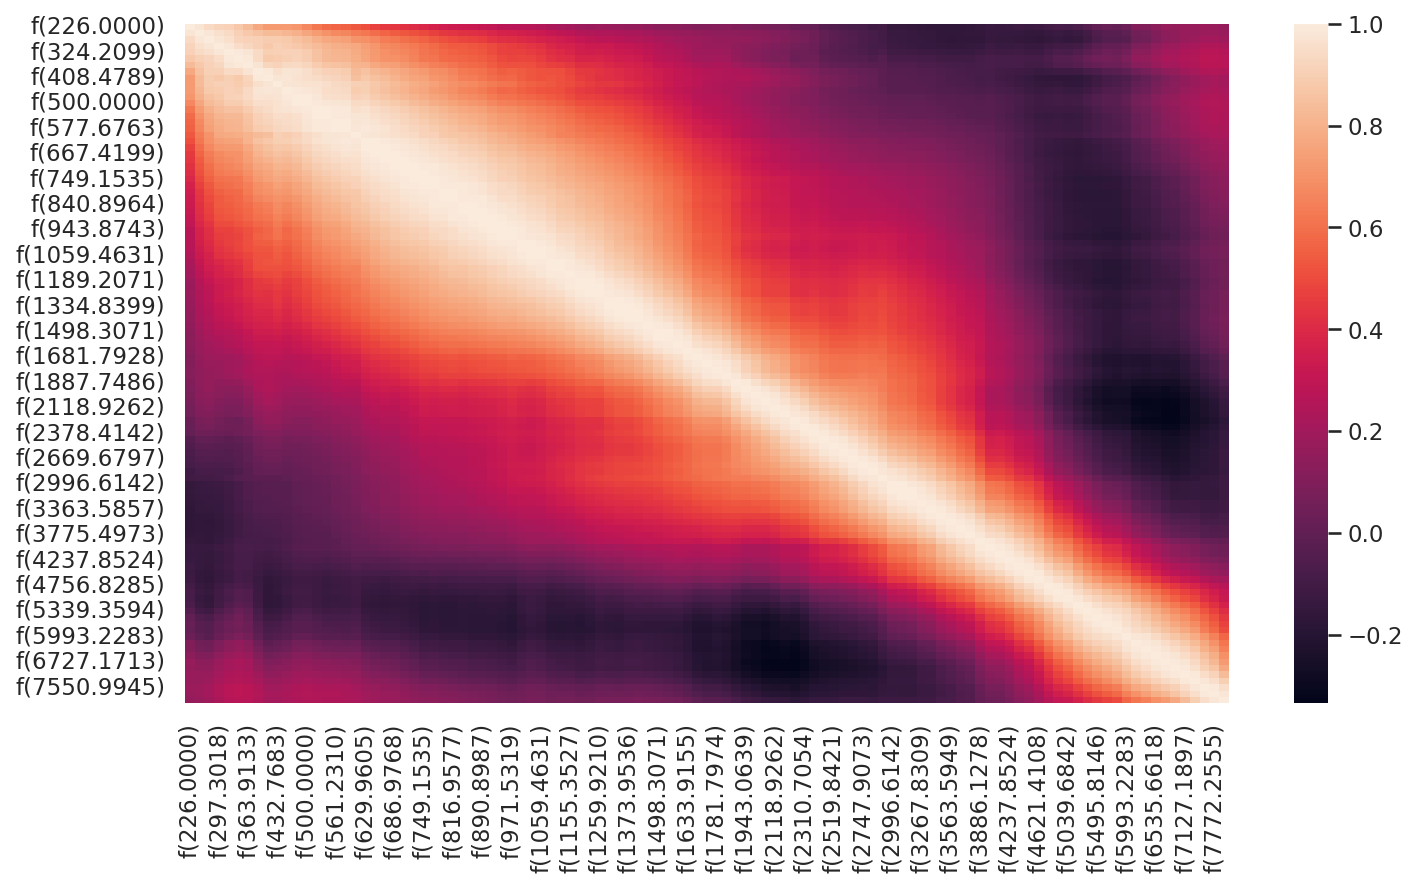

In [293]:
corr_matrix_freq = df[freq_cols].corr()
plt.figure(figsize=(10, 6), dpi=150)
sns.set(rc={'figure.figsize':(50,30)})
sns.heatmap(corr_matrix_freq)

## 2.2 Principal Components - correlations

To solve the multicollinearity issue, we conducted PCA. Preserving 99% of variance leads to 15 principal components. As we can see from the plot below, the principal components are uncorrelated, solving this issue.

<AxesSubplot:>

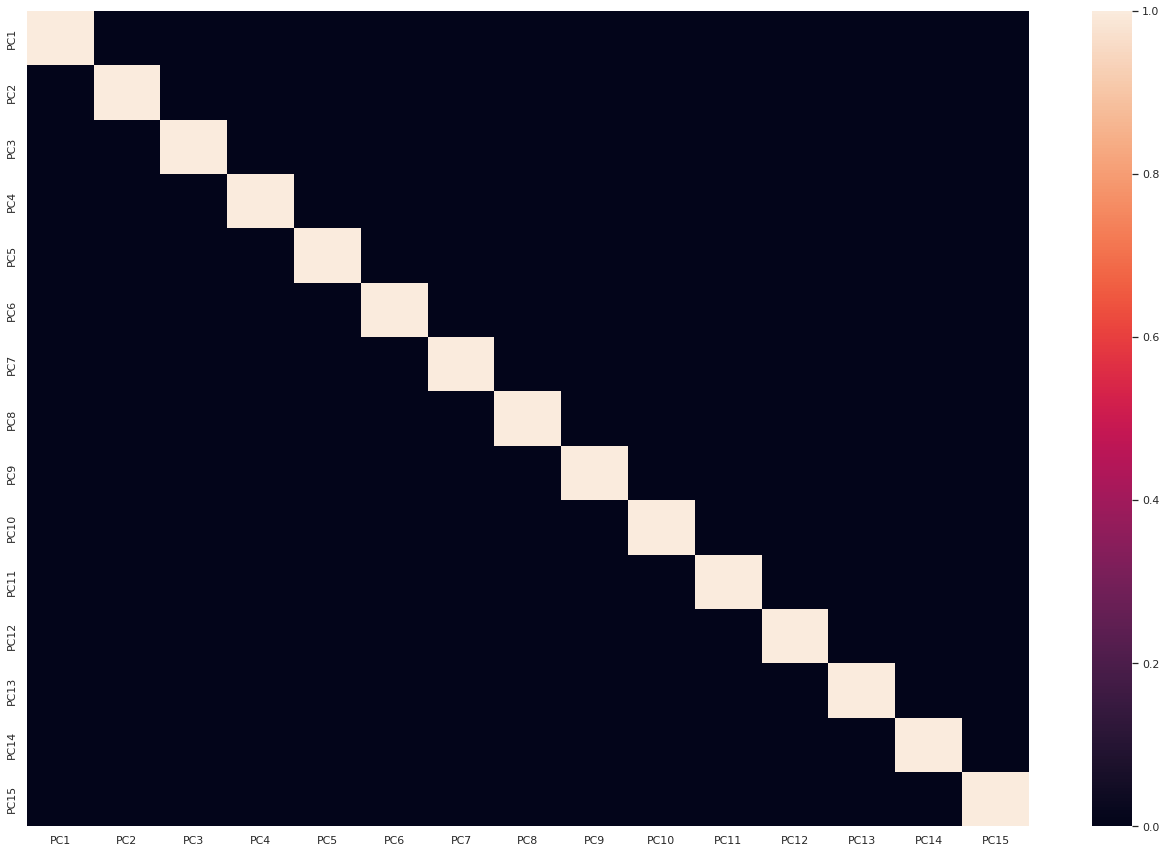

In [294]:
corr_matrix_pca = df[pca_cols].corr()

sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(corr_matrix_pca)

# 3.0 General Distributions

## 3.1 Box Plot per Frequency

The timeseries of boxplots show us the trends in the width of the interquartile range (interval in which 50% of data points exist from the medium).

The trends suggests that the interquartile range of absorbance values increases with increasing frequency.

In [295]:
wba_df = df[freq_cols].melt()
pca_df = df[pca_cols].melt()

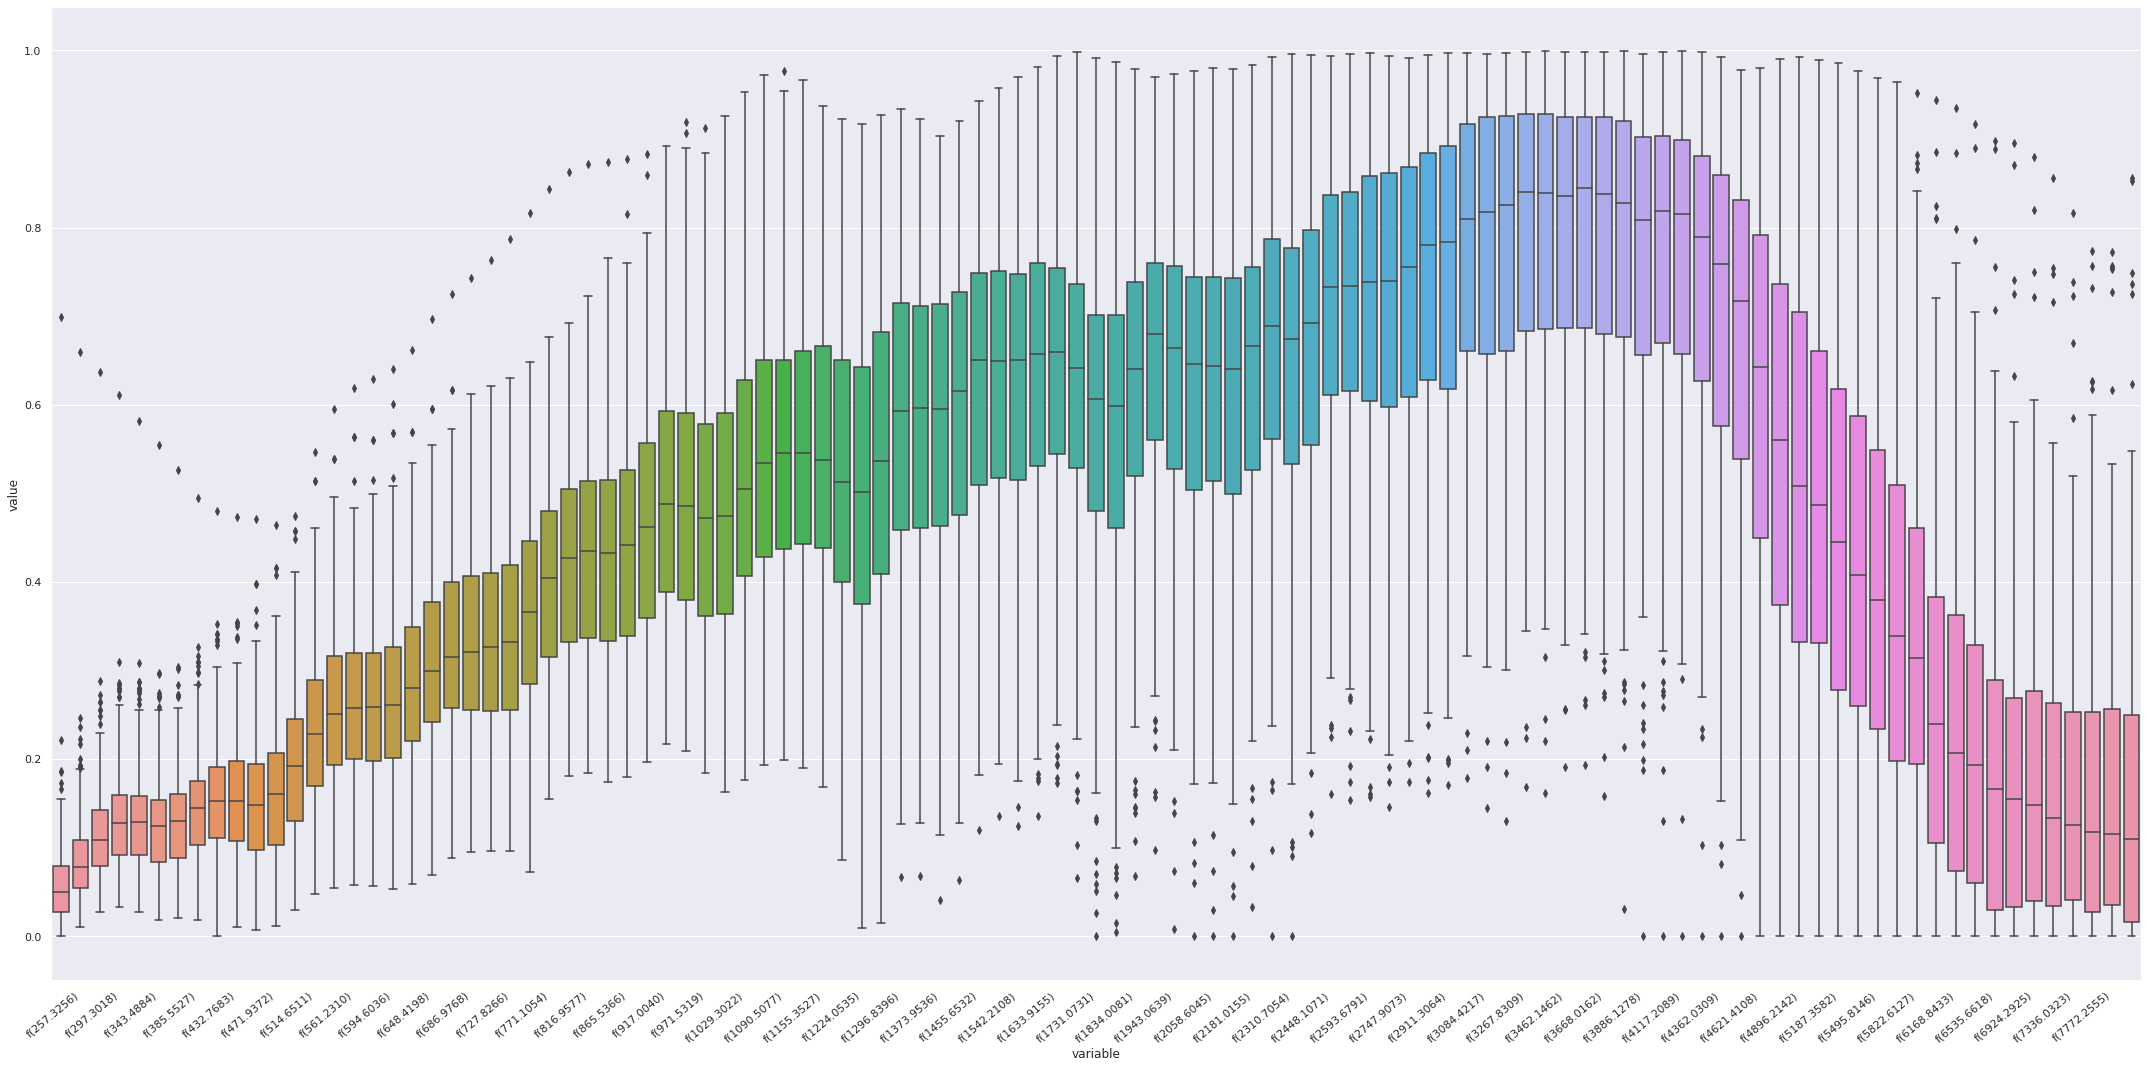

In [296]:
sns.set(rc={'figure.figsize':(30,15)})
ax = sns.boxplot(x="variable", y="value", data=wba_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)

plt.tight_layout()
plt.show();

## 3.2 Confidence Interval (95%) per Frequency

The mean and the 95% confidence interval is much tighter than the boxplot 

but suggest a similar trend - an increasing confidence interval with increasing frequency


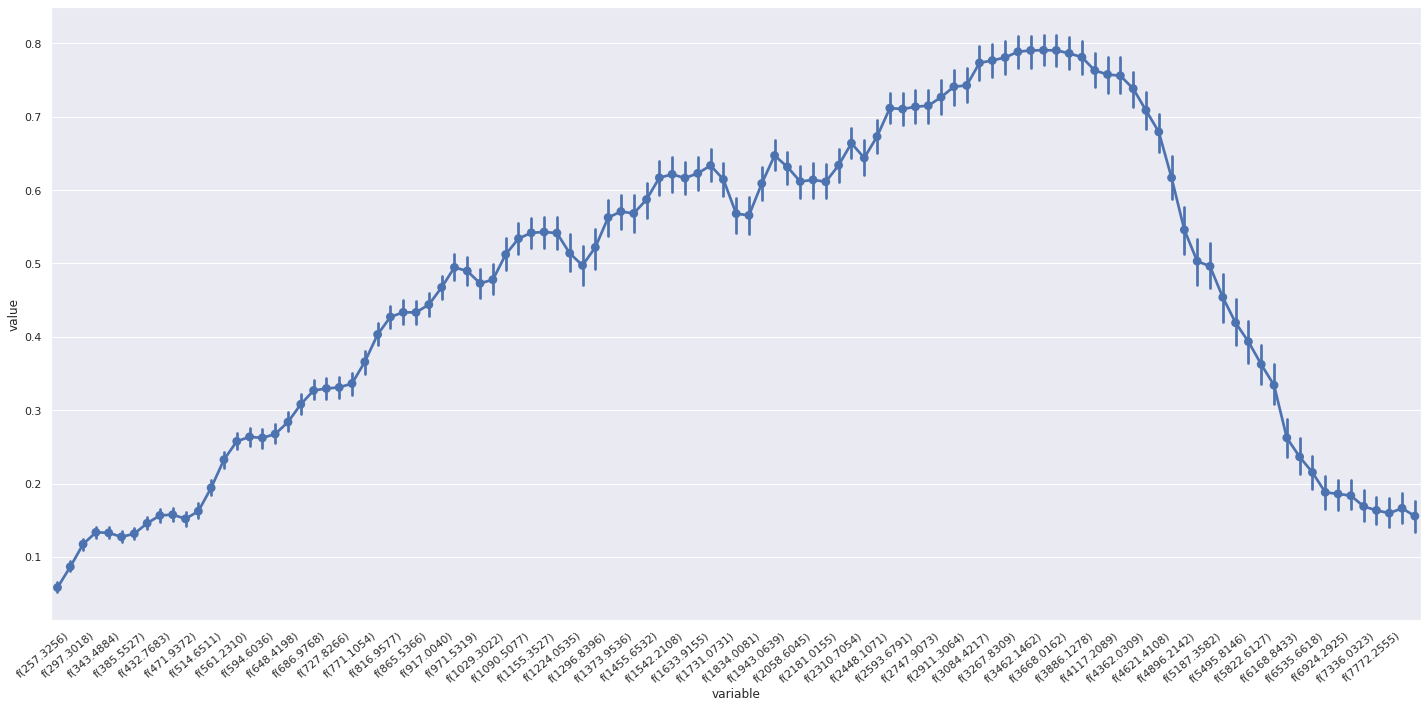

In [297]:
ax = sns.pointplot(x='variable', y='value', data=wba_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.set(title = 'Mean and 95% Confidence Interval')

sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)

plt.tight_layout()
plt.show();

- Absorbance is the measure of the proportion of sound absorbed by the middle ear. 
- A higher absorbance indicates an easier ability to hear a sound at a particular frequency.
- Our WBA curve suggests an intuitive trend with smallest absorbance (least ability to hear) at lowest and highest frequencies. 
- Most easily heard frequencies are in the hearing (2K to 6K) range, with large absorbance values.

# 4.0 Overall Pass and Fail Comparison

Creating overall pass/fail dataframe in long format.

In [298]:
overall_pof_df = df[['OverallPoF'] + freq_cols]
overall_pof_df = overall_pof_df.replace({'OverallPoF':{0: 'Pass', 1: 'Fail'}})
overall_pof_df = overall_pof_df.groupby('OverallPoF').mean()
overall_pof_df = overall_pof_df.melt(ignore_index=False)
overall_pof_df = overall_pof_df.reset_index()

## 4.1 Statistically Different: Overall Pass/Fail

We conduct a t-test at each frequency level (5% significance level) to see whether the difference in (mean) absorption between overall pass and fail instances is statistically significant.


In [299]:
# Replacing 0 and 1 with Pass and Fail
df1 = df[['OverallPoF'] + freq_cols]
df1 = df1.replace({'OverallPoF':{0: 'Pass', 1: 'Fail'}})
df1 = df1.melt(id_vars=['OverallPoF'])

# Conducting t-tests
genders, frequencies = df1['OverallPoF'].unique(), df1['variable'].unique()
pvalues = []
for freq in frequencies:
    x1 = df1.loc[(df1['variable'] == freq) & (df1['OverallPoF'] == 'Pass')].value.to_list()
    x2 = df1.loc[(df1['variable'] == freq) & (df1['OverallPoF'] == 'Fail')].value.to_list()
    pvalue = stats.ttest_ind(x1, x2, equal_var=False).pvalue
    pvalues.extend([(freq, pvalue)])

The following plot has vertical red lines where the difference between mean absorbance between overall pass and fail instances is statisticall significant at that particular frequency. 

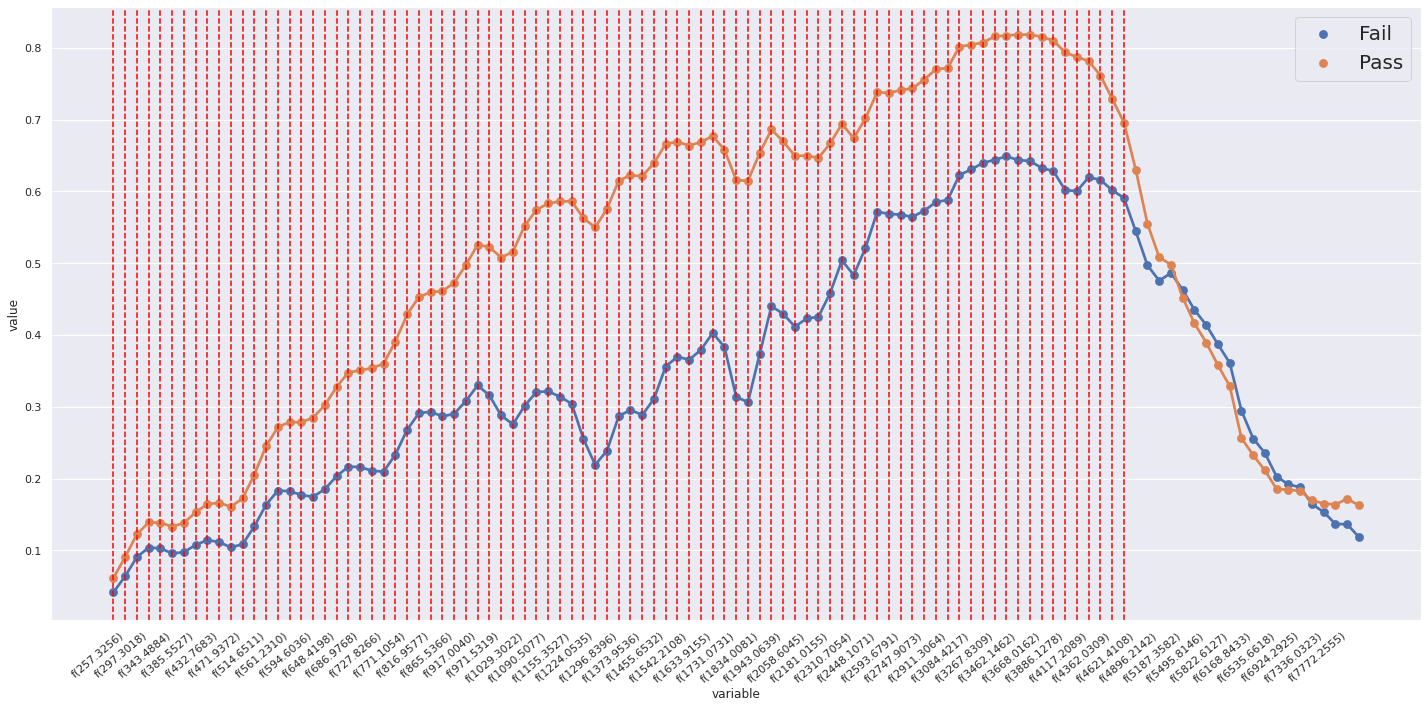

In [300]:
# Plotting
ax = sns.pointplot(x='variable', y='value', hue='OverallPoF', data=overall_pof_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Red line if p-value < 0.05 (significant difference between means)
for pvalue in pvalues:
    if pvalue[1] < 0.05:
        ax.axvline(pvalue[0], ls='--', color='red')

# Show only every 2 tick labels on x-axis
sns.set(rc={'figure.figsize':(30,30)})
plt.setp(ax.get_xticklabels()[::2], visible=False)
plt.legend(fontsize=20) # using a size in points
plt.tight_layout()
plt.show();

Based on this, the absorbance for the range of frequencies is statistically different between individuals that pass or fail some audiometry test at frequencies below ~4600Hz.

With individuals that pass all hearing tests with higher absorbance values (i.e. better hearing).

# 5.0 Control Variables

## 5.1 Gender

Creating long-format gender dataframe.

In [301]:
gender_df = df[['Gender'] + freq_cols]
gender_df = gender_df.replace({'Gender':{0: 'Male', 1: 'Female'}})
gender_df = gender_df.groupby('Gender').mean()
gender_df = gender_df.melt(ignore_index=False)
gender_df = gender_df.reset_index()

We will conduct a similar t-test as above, but this time to determine the statistical significance of differences between genders' absorption levels at each frequency.

In [302]:
df2 = df[['Gender'] + freq_cols]
df2 = df2.replace({'Gender':{0: 'Male', 1: 'Female'}})
df2 = df2.melt(id_vars=['Gender'])

genders, frequencies = df2['Gender'].unique(), df2['variable'].unique()
pvalues = []
for freq in frequencies:
    x1 = df2.loc[(df2['variable'] == freq) & (df2['Gender'] == 'Male')].value.to_list()
    x2 = df2.loc[(df2['variable'] == freq) & (df2['Gender'] == 'Female')].value.to_list()
    pvalue = stats.ttest_ind(x1, x2, equal_var=False).pvalue
    pvalues.extend([(freq, pvalue)])

The following plot has vertical red lines where the difference between mean absorbance between male and female instances is statisticall significant at that particular frequency. 

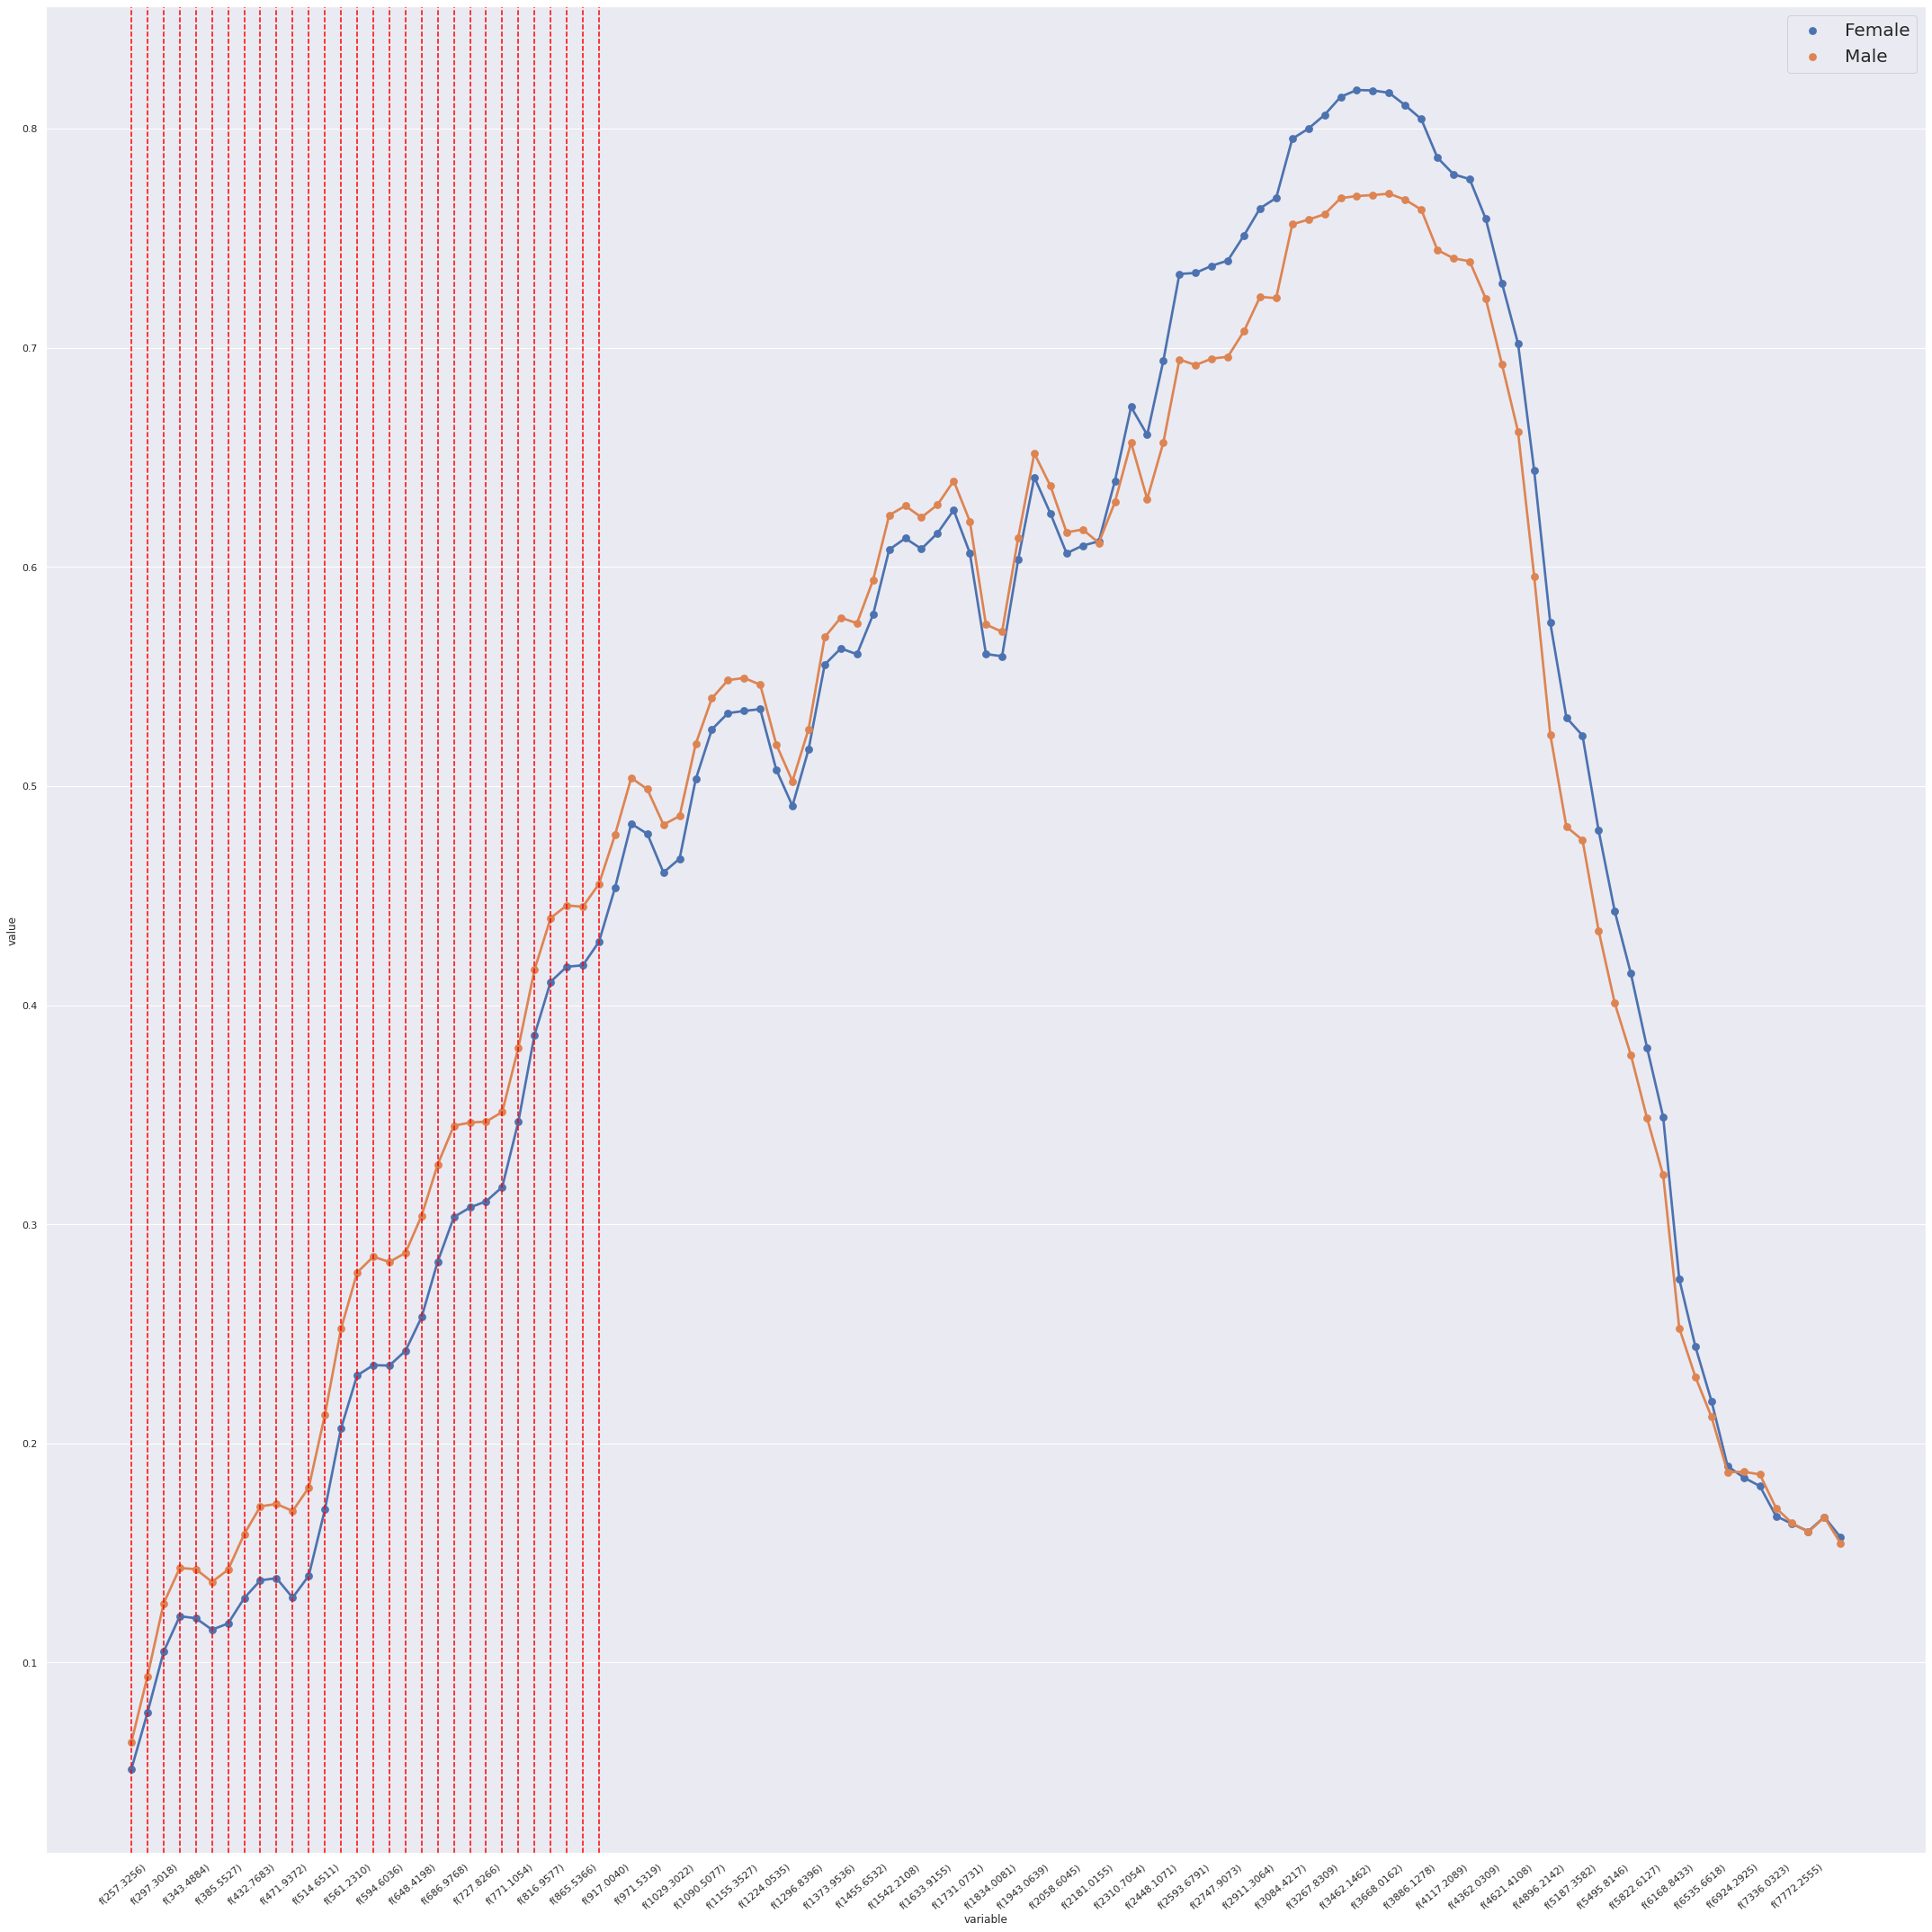

In [303]:
# Plotting
ax = sns.pointplot(x='variable', y='value', hue='Gender', data=gender_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Red lines for p-value < 0.05 for t-test
for pvalue in pvalues:
    if pvalue[1] < 0.05:
        ax.axvline(pvalue[0], ls='--', color='red')

sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)
plt.legend(fontsize=20) # using a size in points
plt.tight_layout()
plt.show();

Interestingly males and females have statistically different absorbance values at frequencies below 900Hz, with males having better hearing at lower frequencies.

## 5.2 Age

In [304]:
age_df = df[['AgeY'] + freq_cols]
age_df['AgeY'] = age_df['AgeY'].apply(lambda x: round(x))
age_df = age_df.groupby('AgeY').mean()
age_df = age_df.melt(ignore_index=False)
age_df = age_df.reset_index()

In [307]:
df3 = df[['AgeY'] + freq_cols]
df3['AgeY'] = df3['AgeY'].apply(lambda x: round(x))
df3 = df3.melt(id_vars=['AgeY'])

genders, frequencies = df3['AgeY'].unique(), df3['variable'].unique()
pvalues = []
for freq in frequencies:
    x1 = df3.loc[(df3['variable'] == freq) & (df3['AgeY'] == 8)].value.to_list()
    x2 = df3.loc[(df3['variable'] == freq) & (df3['AgeY'] == 9)].value.to_list()
    x3 = df3.loc[(df3['variable'] == freq) & (df3['AgeY'] == 10)].value.to_list()
    x4 = df3.loc[(df3['variable'] == freq) & (df3['AgeY'] == 11)].value.to_list()
    pvalue = f_oneway(x1, x2, x3, x4)[1][0]
    pvalues.extend([(freq, pvalue)])

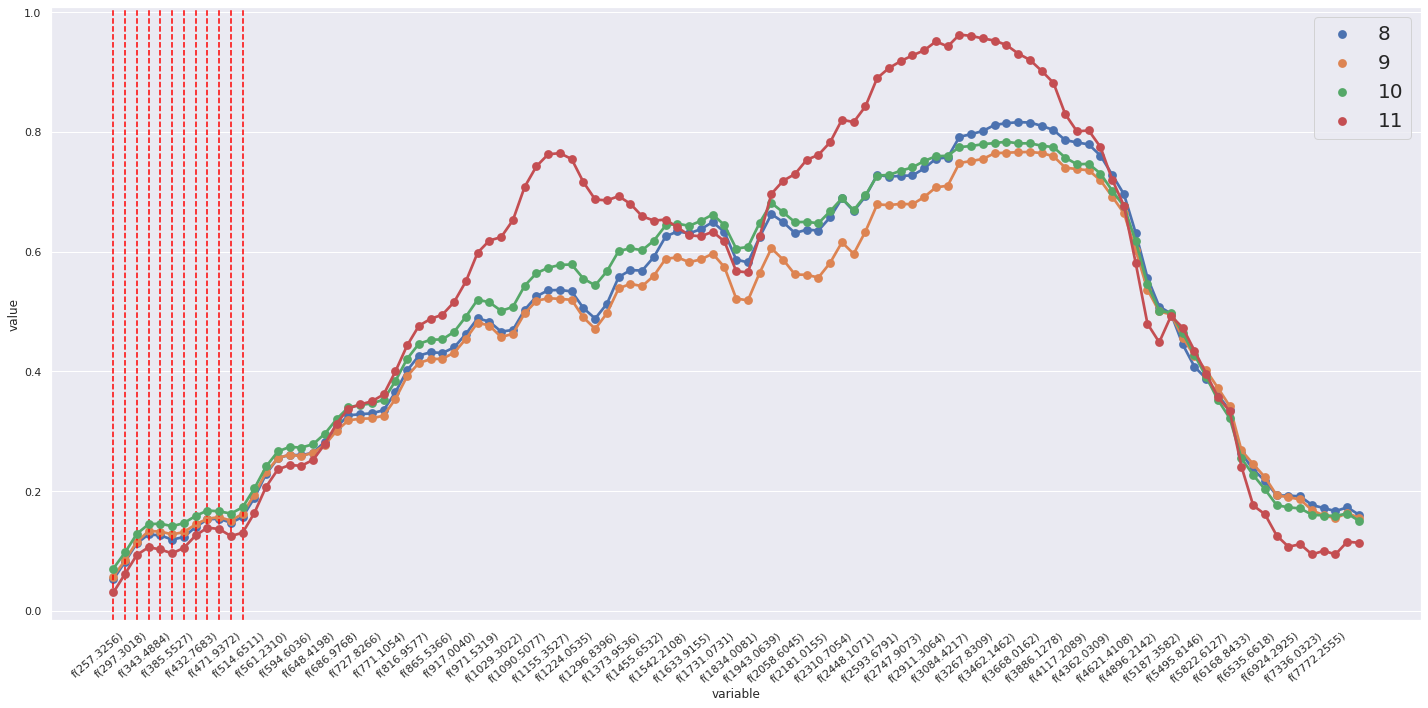

In [308]:
# Plotting
ax = sns.pointplot(x='variable', y='value', hue='AgeY', data=age_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Red line if p-value < 0.05 (significant difference between means)
for pvalue in pvalues:
    if pvalue[1] < 0.05:
        ax.axvline(pvalue[0], ls='--', color='red')

# Show only every 2 tick labels on x-axis
sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)
plt.legend(fontsize=20) # using a size in points
plt.tight_layout()
plt.show();

Interestingly absorbance values for age are statistically different below 500Hz with no real trends. Abosrbance / Hearing ability increases from age 8 to 10 but drop noticeable at age 11.

## 5.3 Ear Side

In [309]:
ear_df = df[['Ear coded'] + freq_cols]
ear_df = ear_df.groupby('Ear coded').mean()
ear_df = ear_df.melt(ignore_index=False)
ear_df = ear_df.reset_index()

In [310]:
df4 = df[['Ear coded'] + freq_cols]
df4 = df4.replace({'Ear coded':{0: 'Left', 1: 'Right'}})
df4 = df4.melt(id_vars=['Ear coded'])

frequencies = df4['variable'].unique()
pvalues = []
for freq in frequencies:
    x1 = df4.loc[(df4['variable'] == freq) & (df4['Ear coded'] == 'Left')].value.to_list()
    x2 = df4.loc[(df4['variable'] == freq) & (df4['Ear coded'] == 'Right')].value.to_list()
    pvalue = stats.ttest_ind(x1, x2, equal_var=False).pvalue
    pvalues.extend([(freq, pvalue)])

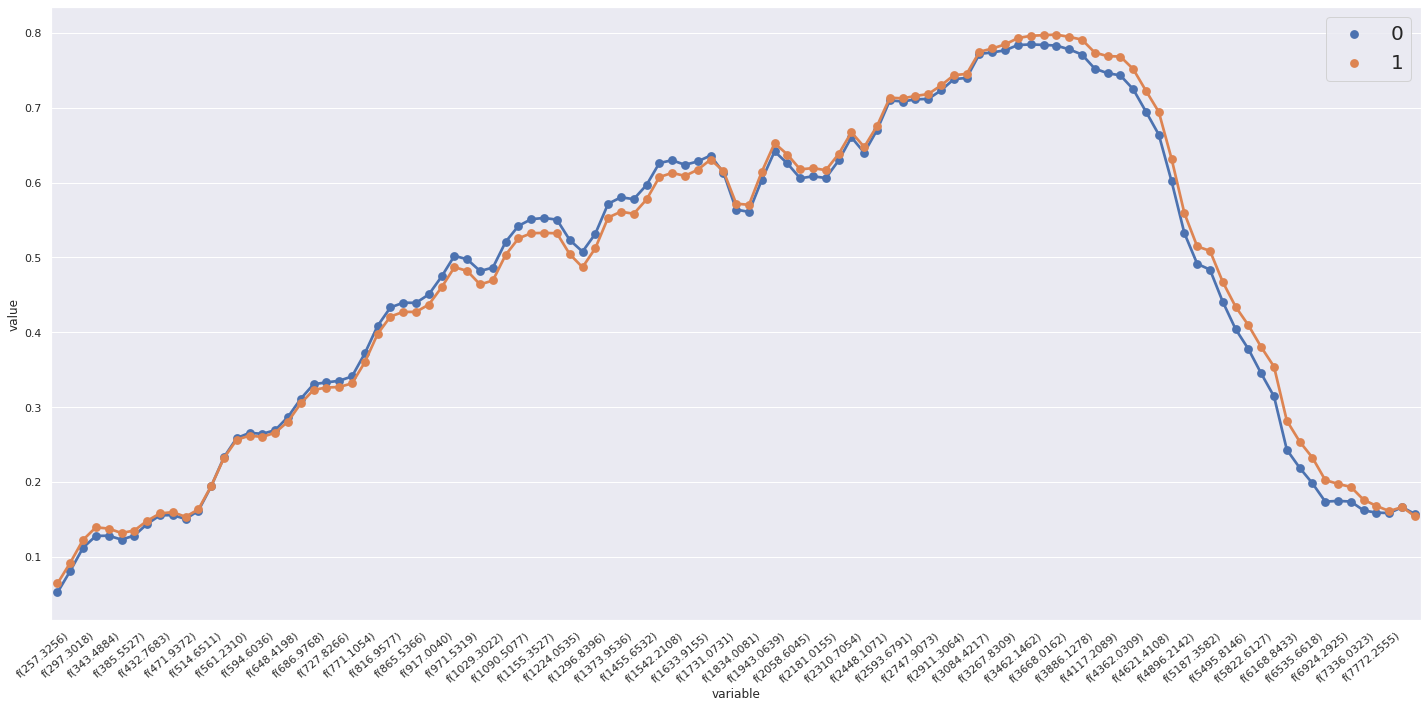

In [311]:
ax = sns.pointplot(x='variable', y='value', hue='Ear coded', data=ear_df)
for pvalue in pvalues:
    if pvalue[1] < 0.05:
        ax.axvline(pvalue[0], ls='--', color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)
plt.legend(fontsize=20) # using a size in points
plt.tight_layout()
plt.show();

Earside whether left or right has no statistically significant affect on the absorbance values (i.e. ability for individuals to hear) at any particular frequency.

## 5.4 Tymphanic Membrane Type

In [320]:
tymptype_df = df[['TympType'] + freq_cols]
tymptype_df = tymptype_df.replace({'TympType':{0: 'Abnormal', 1: 'Normal'}})
tymptype_df = tymptype_df.groupby('TympType').mean()
tymptype_df = tymptype_df.melt(ignore_index=False)
tymptype_df = tymptype_df.reset_index()

In [321]:
df5 = df[['TympType'] + freq_cols]
df5 = df5.replace({'TympType':{0: 'Abnormal', 1: 'Normal'}})
df5 = df5.melt(id_vars=['TympType'])

frequencies = df5['variable'].unique()
pvalues = []
for freq in frequencies:
    x1 = df5.loc[(df5['variable'] == freq) & (df5['TympType'] == 'Abnormal')].value.to_list()
    x2 = df5.loc[(df5['variable'] == freq) & (df5['TympType'] == 'Normal')].value.to_list()
    pvalue = stats.ttest_ind(x1, x2, equal_var=False).pvalue
    pvalues.extend([(freq, pvalue)])

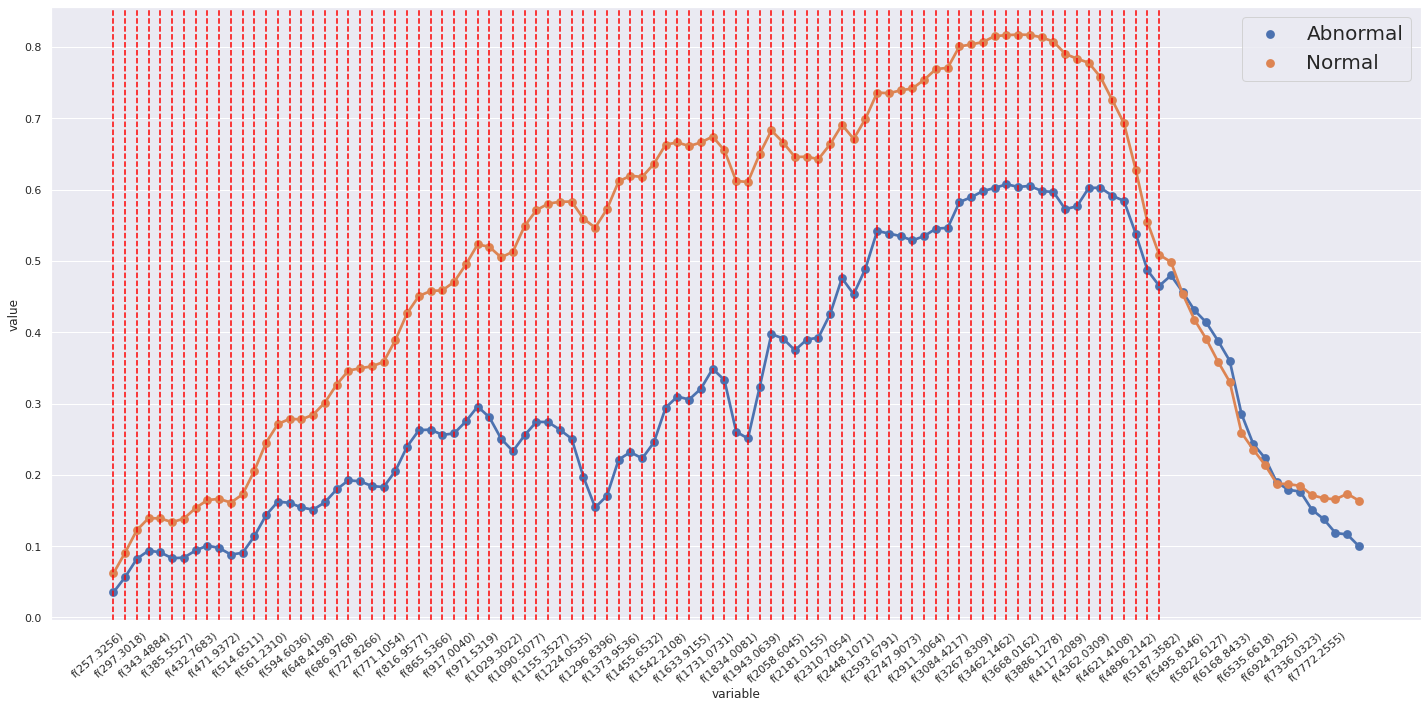

In [322]:
ax = sns.pointplot(x='variable', y='value', hue='TympType', data=tymptype_df)
for pvalue in pvalues:
    if pvalue[1] < 0.05:
        ax.axvline(pvalue[0], ls='--', color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)
plt.legend(fontsize=20) # using a size in points
plt.tight_layout()
plt.show();

Earside typhanic membrane type (either normal or abnormal) has a statistically significant affect on the absorbance values (i.e. ability for individuals to hear) at most frequencies.

## 6 Clustering

With the use of four variables - Gender, AgeY, ECV and TPP, we are able to well seperate individuals that fail or pass audiometry tests based on our clustering results.

In [323]:
wba_df = df[["Gender", "AgeY", "ECV", "TPP"]]
kmeans = KMeans(n_clusters=2, random_state=0).fit(wba_df)

cluster1 = np.where(kmeans.labels_ == 1)[0]
cluster2 = np.where(kmeans.labels_ == 0)[0]

In [324]:
p = sum(df.loc[cluster1, 'OverallPoF'])/len(cluster1)
print("Proportion of failures in cluster 1: {}".format(p))

Proportion of failures in cluster 1: 1.0


In [325]:
p = sum(df.loc[cluster2, 'OverallPoF'])/len(cluster2)
print("Proportion of failures in cluster 2: {}".format(p))

Proportion of failures in cluster 2: 0.056338028169014086


The comparison of cluster means suggest that those individuals that fail audiometry tests have a much higher (Tympanometric Peak Pressure)

In [326]:
kmeans.cluster_centers_

array([[   0.42723005,    8.86345853,    1.00225352,  -19.68176574],
       [   0.5       ,    8.91346154,    0.96961538, -207.11538462]])

We can visualise our two clusters along the first two principal axes.

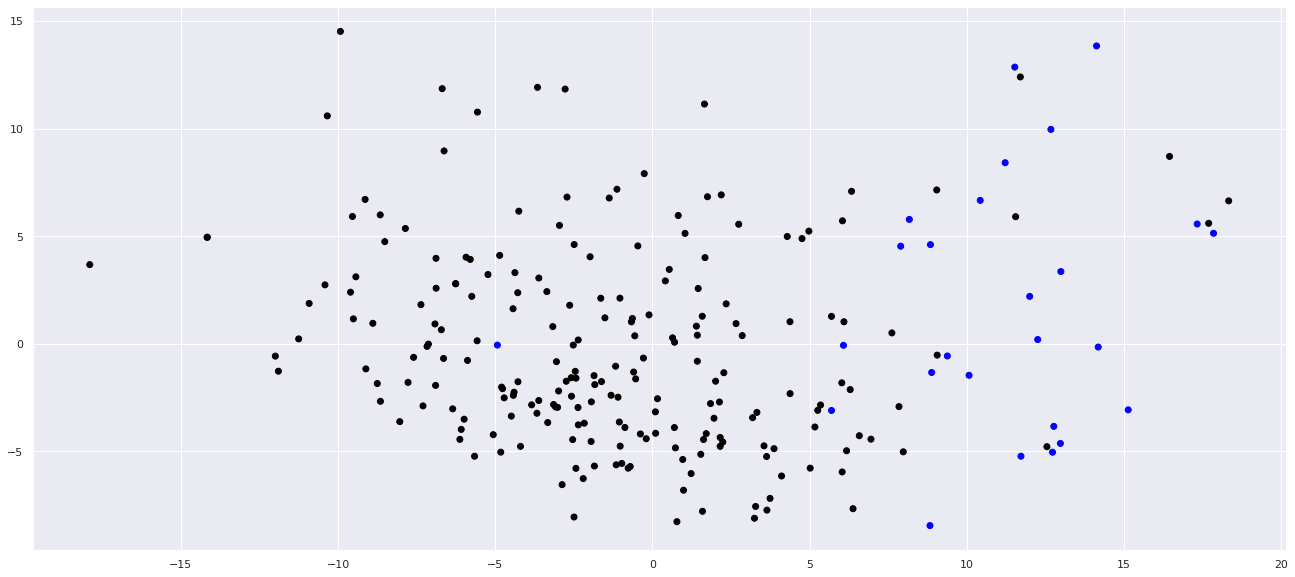

In [327]:
colors = ["blue" if x == 1 else "black" for x in kmeans.labels_]
plt.scatter(df[pca_cols]["PC1"], df[pca_cols]["PC2"], c=colors)